**"Pipeline machine learning"**
- Selection de variable (elastic net)
- => reduction de dimension (PCR , clustering ...)
- => Classification // Regression (modèles lineaires / modeles généralisés / random forest / neural network)

# Classification

Cette partie se découpe comme la précédente. Il s’agit tout d’abord d’appliquer des techniques classiques de classification sur un jeu de données ’modèle", puis de transposer, dans un second temps, à un jeu de données réel. La réponse est, cette fois-ci, une grandeur qualitative (stockée dans la colone gr). On cherche à l’expliquer en fonction des facteurs x et y (quantitatifs) et ind (qualitatif). Vous remarquerez que la colonne out contient une retranscription quantitative de la réponse qualitative gr. Il vous faudra vous servir de l’un ou de l’autre en fonction des questions abordées.
Dans les exemples de code indiqués ci-dessous, le tableau de données se nomme data2. Il faudra adapter en conséquence si vous décidiez de le nommer autrement.

In [157]:
library(glmnet)
library(ggplot2)
library(MASS)

## VIsualisation et prediction du modele

Dans cette section, on verra comment améliorer le rendu des graphiques sous R, ainsi que comment déterminer la prédiction faite par un modèle linéaire.
1. Importez le jeu de données intitulé "data2.txt"
2. On va tout d’abord visualiser les données. Installez le package ggplot2, puis écrivez la com- mandesuivante:ggplot(data2,aes(x=x,y=y,col=data2""gr)) + geom_point(aes(size = 2))
3. Créezunmodèlelinéaire,mod21,expliquantlegroupedesindividusenfonctiondescolonnes x, y et ind.
4. Identifiez les coefficients du modèle et concluez quant aux facteurs d’importance.
On rappelle que le modèle linéaire créé à la question précédente propose d’expliquer l’indice
du groupe en fonction de x, y et ind : y = β0 + βxx + βyy + βind + ε.
5. Calculez la prédiction faite pour l’individu no5. On rappelle que pour accéder aux éléments d’un vecteur, il faut utiliser les crochets. Par exemple, le second coefficient du modèle est accessible en écrivant mod21$coefficients[2].
6. Calculezlerésiduassociéàcetindividuetvérifiezvotrecalculenregardantmod21""resisudals.

Pour de la classifciation, transformer les valeurs de quels groupe en chifre (0,1) ou autres. Ca transforme le problème en de la régression

In [16]:
data2=read.table("data2.txt", header=TRUE)

In [3]:
head(data2)

x          y gr out   ind
1 1.3433008 -2.3592753 g1   0  TRUE
2 4.5906449 -0.2879178 g1   0  TRUE
3 0.7633705 -1.1829348 g1   0  TRUE
4 1.3269341  0.5998377 g1   0 FALSE
5 3.2666904  3.2590222 g1   0 FALSE
6 1.4836220  1.0217027 g1   0 FALSE

### Plotting the two groups

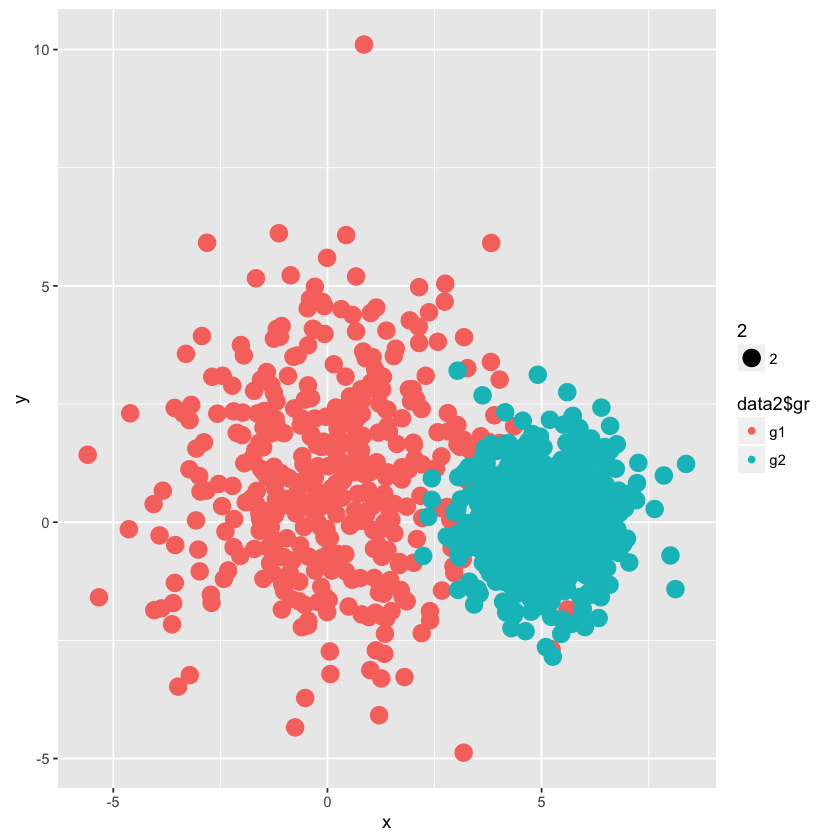

In [5]:
ggplot(data2,aes(x=x,y=y,col=data2$gr)) + geom_point(aes(size = 2))

## Create a linear model

Nous allons maintenant exploiter les prédictions que peut faire le modèle afin d’en tirer une classification.
7. Enfonctiondelavaleurprédite,proposez une régle de décision quant au groupe de l’individu no5. Plutôt que de calculer une à une toutes les prédictions du modèle, on peut y accéder par la commande predict(mod21).
8. Créez la colonne pred à l’aide de la commande suivante :
data2""pred = as.numeric(predict(mod21) > 0.5)
. Que fait cette commande et que contient le vecteur pred ?
9. Créez une table de contingence afin de visualiser la différence entre les prédictions du modèle
mod21 et les groupes "réels".
10. Tapez la commande :
      ggplot(data2,aes(x=x,y=y,col=data2""gr, shape = data2""pred)) +
      geom_point(aes(size = 2))
pour visualiser ces différences. Identifiez la frontière de décision entre les deux groupes.


In [17]:
mod21=lm (data2$out ~ data2$x + data2$y + data2$ind)

In [18]:
summary(mod21)


Call:
lm(formula = data2$out ~ data2$x + data2$y + data2$ind)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04608 -0.12761  0.04093  0.16573  0.69858 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.155266   0.014446  10.748  < 2e-16 ***
data2$x        0.147227   0.002863  51.429  < 2e-16 ***
data2$y       -0.029118   0.005148  -5.657 2.02e-08 ***
data2$indTRUE  0.011974   0.015607   0.767    0.443    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2465 on 996 degrees of freedom
Multiple R-squared:  0.7479,	Adjusted R-squared:  0.7471 
F-statistic: 984.7 on 3 and 996 DF,  p-value: < 2.2e-16


**les facteurs significatifs sont x et y**

**Manually predict with all factors of the model**

Quand variable qualitative => R calcule un coefficient 

In [21]:
mod21$coefficients[1]+mod21$coefficients[2]*data2[5,1]+mod21$coefficients[3]*data2[5,2]+mod21$coefficients[4]*data2[5,5] 

(Intercept) 
  0.5413121

In [22]:
predict_mod21=predict(mod21)

### Using elastic net

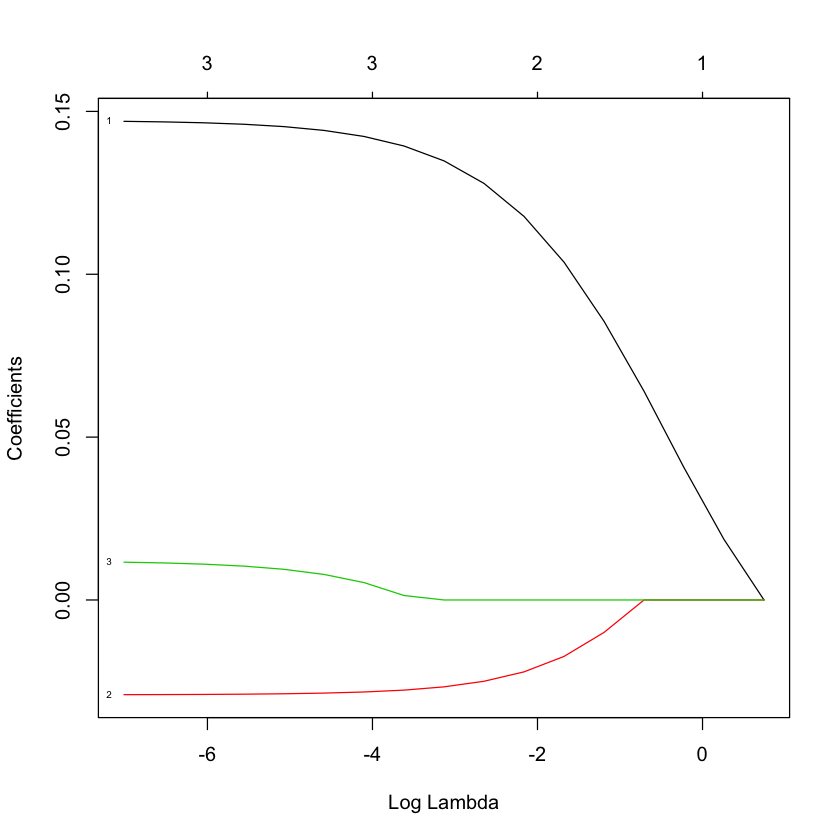

In [20]:
fit = glmnet(as.matrix(data2[,c(1,2,5)]), data2$out, alpha = 0.2, nlambda = 20)
plot(fit, xvar = "lambda", label = TRUE)

**Prediction avec Cv fit**

In [19]:
cvfit = cv.glmnet(as.matrix(data2[,c(1,2,5)]), data2$out , type.measure = "mse", nfolds = 20)
#cvfit$lambda.min
#coef(cvfit, s = "lambda.min")
predict_elastic_net=predict(cvfit,newx=as.matrix(data2[,c(1,2,5)]),s = "lambda.min")

### Classification

** pour la classification, on transforme un nombre entre 0 et 1 predit par le modèle linéaire en 0 ou 1 pour les catégories**

DOnne la prédiction de quel groupe on va avoir en arrondissant à l'entier supérieur.

In [24]:
#Prediction linear model
data2$pred_lm = factor(as.numeric(predict(mod21) > 0.5))
#Prediction elastic net
data2$pred_elsaticnet = factor(as.numeric(predict(cvfit,newx=as.matrix(data2[,c(1,2,5)]),s = "lambda.min")) > 0.5)

In [25]:
head(data2)

x          y gr out   ind pred_lm pred_elsaticnet
1 1.3433008 -2.3592753 g1   0  TRUE       0           FALSE
2 4.5906449 -0.2879178 g1   0  TRUE       1            TRUE
3 0.7633705 -1.1829348 g1   0  TRUE       0           FALSE
4 1.3269341  0.5998377 g1   0 FALSE       0           FALSE
5 3.2666904  3.2590222 g1   0 FALSE       1            TRUE
6 1.4836220  1.0217027 g1   0 FALSE       0           FALSE

In [27]:
table(data2$out,data2$pred_lm)
table(data2$out,data2$pred_elsaticnet)

   
      0   1
  0 356  44
  1   1 599

   
    FALSE TRUE
  0   356   44
  1     1  599

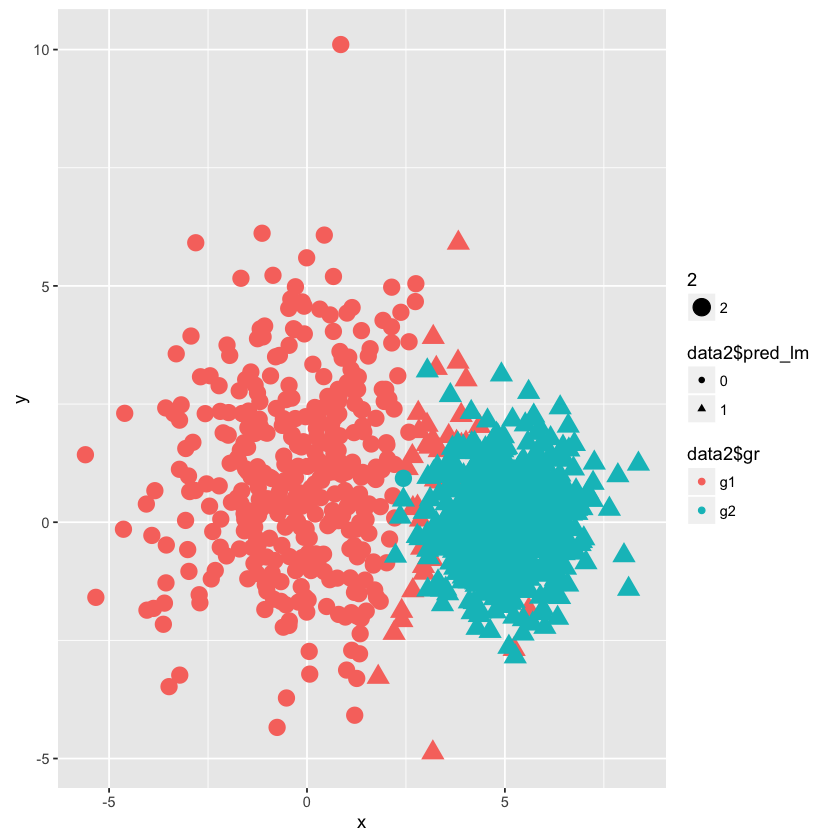

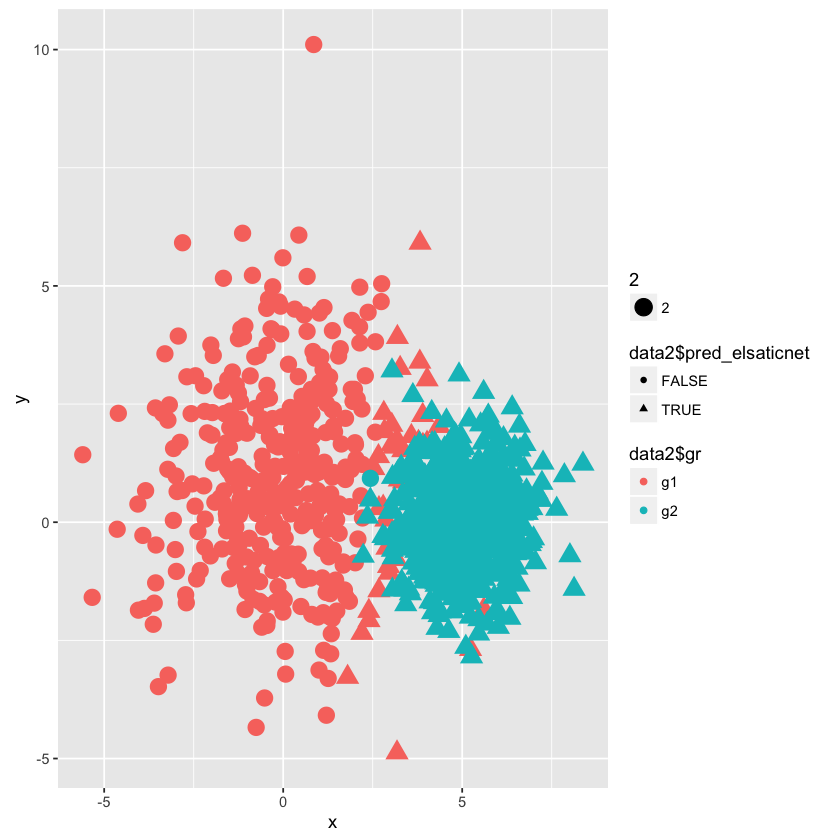

In [28]:
ggplot(data2,aes(x=x,y=y,col=data2$gr, shape = data2$pred_lm)) + geom_point(aes(size = 2))
ggplot(data2,aes(x=x,y=y,col=data2$gr, shape = data2$pred_elsaticnet)) + geom_point(aes(size = 2))

**Calcul de la frontière**

resoudre $intercept+ coef1*X + coef2*y=0.5$

corresponds to $y=(0.5-intercept-coef1*X)/coef2$

In [34]:
intercept_frontier=(0.5-mod21$coefficients[1])/mod21$coefficients[3]
slope_frontier=-mod21$coefficients[2]/mod21$coefficients[3]

In [35]:
intercept_frontier
slope_frontier

(Intercept) 
  -11.83906

data2$x 
5.05614

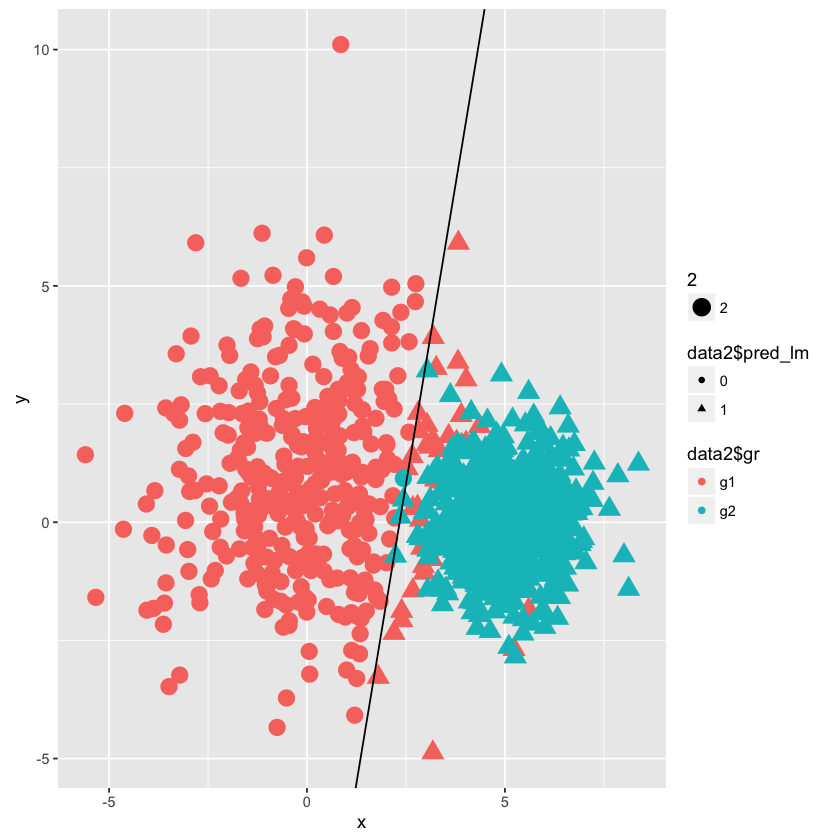

In [36]:
ggplot(data2,aes(x=x,y=y,col=data2$gr, shape = data2$pred_lm)) + geom_point(aes(size = 2))+geom_abline(intercept=intercept_frontier, slope=slope_frontier)


##Extending dimension

Dans cette section, nous allons artificellement créer des colonnes supplémentaires, et refaire des prédictions avec un modèle plus grand.
11. Créez des colonnes x2, y2 et xy dans le tableau de données, qui contiennt respectivement la colonne x au carré, la colonne y au carré et le produit des colonnes x et y.
3
12. Créez un modèle linéaire mod22 qui explique la colonne out en fonction des colonnes x, y, x2, y2 et xy.
13. Reprenez les questions 9 et 10 avec mod22. Que concluez-vous ?
14. Il est normal (obligatoire même) que les prédictions du modèle mod22 soient meilleures que
celles du modèle mod21 : Pourquoi ?

In [215]:
data2$x2=data2$x^2
data2$y2=data2$y^2
data2$xy=data2$x*data2$y

In [40]:
mod22=lm (data2$out ~ data2$x + data2$y + data2$x2 + data2$y2 + data2$xy)

In [45]:
summary(mod22)


Call:
lm(formula = data2$out ~ data2$x + data2$y + data2$x2 + data2$y2 + 
    data2$xy)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.06310 -0.14318  0.01913  0.16235  0.72889 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1401015  0.0136009  10.301  < 2e-16 ***
data2$x      0.1140765  0.0050012  22.810  < 2e-16 ***
data2$y      0.0012869  0.0068003   0.189 0.849942    
data2$x2     0.0078732  0.0009994   7.878 8.71e-15 ***
data2$y2    -0.0090740  0.0016618  -5.460 6.01e-08 ***
data2$xy    -0.0067415  0.0019138  -3.523 0.000447 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2344 on 994 degrees of freedom
Multiple R-squared:  0.7725,	Adjusted R-squared:  0.7714 
F-statistic: 675.2 on 5 and 994 DF,  p-value: < 2.2e-16


In [41]:
data2$pred_mod22 = factor(as.numeric(predict(mod22) > 0.5))

In [46]:
table(data2$out,data2$pred_lm)
table(data2$out,data2$pred_mod22)

   
      0   1
  0 356  44
  1   1 599

   
      0   1
  0 370  30
  1   5 595

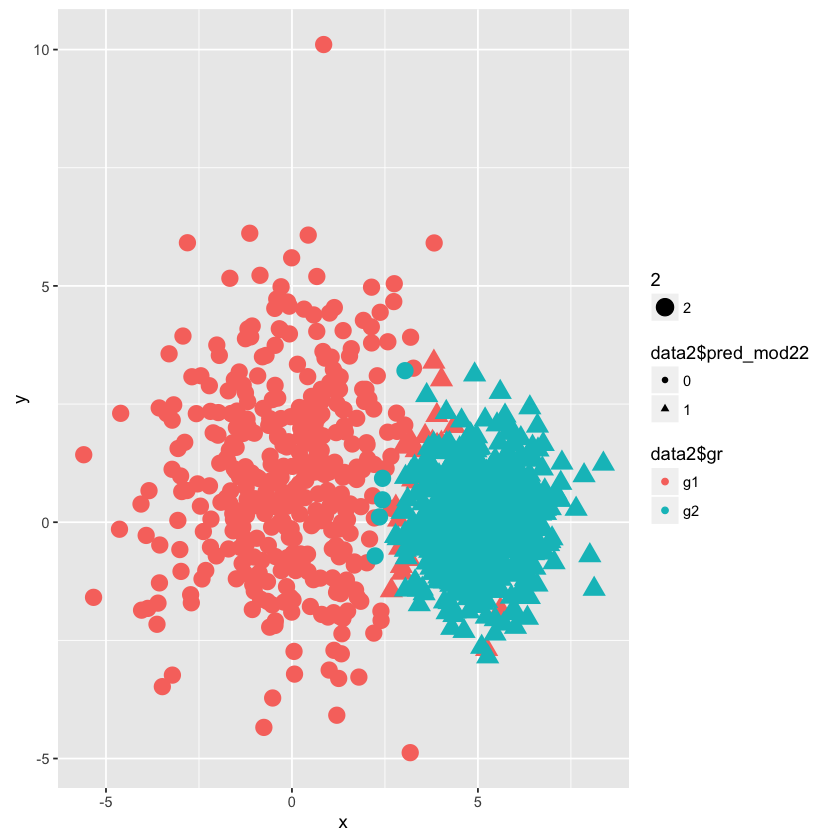

In [47]:
ggplot(data2,aes(x=x,y=y,col=data2$gr, shape = data2$pred_mod22)) + geom_point(aes(size = 2))

le modele 21 est contenu dans le modèle 22 d'ou les prédictions sont meilleures

## Cross validation

Afin de s’assurer que le second modèle est vraiment meilleur que le premier (et pas juste au sens de l’adéquation aux données), nous allons effectuer un début de validation croisée. Pour cela, nous allons d’abord séparer le jeu de données en deux : le jeu d’apprentissage et le jeu de test. Ensuite, nous allons créer un modèle linéaire grâce au jeu d’apprentissage, et tester les prédictions sur le jeu de test.


Il va tout d’abord falloir choisir aléatoirement les éléments du jeu d’apprentissage. Uti- lisez la commande : sample(1:nrow(data2), size = 15, replace = T). Que fait cette commande ?
16. Créez un jeu d’apprentissage nommé data.train et un jeu de test nommé data.test. On rappelle que pour supprimer des lignes d’un tableau de données, on peut utiliser des indices négatifs. Par exemple, la commande data[c(1,3,5),] sélectionne les lignes 1, 3 et 5 d’un jeu de données, tandis que data[-c(1,3,5),] sélectionne toutes les lignes du tableau de données, sauf les lignes 1, 3 et 5.
17. Créez un modèle linéaire mod.train qui explique la réponse out en fonction de x et y dans le jeu de données data.train
18. Trouvez les prédictions faites par ce modèle sur le jeu de données de test. Il faudra pour cela extraire les colonnes x et y du jeu de test, et utiliser la fonction predict().

**Sample aléatoirement 15 valeurs dans data2 (avec remise, replace=true)**

In [48]:
sample(1:nrow(data2), size = 15, replace = F)

[1] 663 721 888 312 738 730 985  21 813 102 573 496 919 497 498

** Sépare le jeu de données en 2. Sample 800 lignes, 80%, et ensuite on prend les lignes correspondantes pour data train et les autres pour data.test** 

In [54]:
sample_line= sample(1:nrow(data2), size = 800, replace = F)
data.train = data2[c(sample_line),]
data.test= data2[-c(sample_line),]

**Pour le predict, il est necessaire d'utiliser les cette synthaxe pour le modèle**

Modèle linéaire à 1 factor

In [63]:
mod.train=lm (out ~ x + y, data = data.train)

In [64]:
predict_test=predict(mod.train,data.test[,c(1,2)])

In [ ]:
data.test$pred_mod.test = factor(predict_test > 0.5)

In [75]:
table(data.test$pred_mod.test,data.test$out)

       
          0   1
  FALSE  77   0
  TRUE    7 116

In [78]:
head(data.test)

x          y gr out   ind pred_lm pred_elsaticnet           x2
1   1.343300823 -2.3592753 g1   0  TRUE       0           FALSE 1.804457e+00
12 -0.310174634  4.0726895 g1   0  TRUE       0           FALSE 9.620830e-02
17 -0.006365659 -1.9015547 g1   0 FALSE       0           FALSE 4.052162e-05
20  0.680485527  1.4547450 g1   0  TRUE       0           FALSE 4.630606e-01
29 -0.941930247  0.9511817 g1   0  TRUE       0           FALSE 8.872326e-01
30 -3.303602704  3.5632292 g1   0  TRUE       0           FALSE 1.091379e+01
           y2           xy pred_mod22 pred_mod.test
1   5.5661801  -3.16921650          0         FALSE
12 16.5868001  -1.26324499          0         FALSE
17  3.6159102   0.01210465          0         FALSE
20  2.1162829   0.98993289          0         FALSE
29  0.9047466  -0.89594681          0         FALSE
30 12.6966020 -11.77149349          0         FALSE

In [76]:
mod.train_complex=lm (out ~ x + y + x2 + y2 + xy, data = data.train)

In [79]:
predict_test=predict(mod.train_complex,data.test[,c(1,2,8,9,10)])

In [80]:
data.test$pred_mod_complex.test = factor(predict_test > 0.5)

In [81]:
table(data.test$pred_mod_complex.test,data.test$out)

       
          0   1
  FALSE  79   3
  TRUE    5 113

In [82]:
table(data.test$pred_mod.test,data.test$out)
table(data.test$pred_mod_complex.test,data.test$out)

       
          0   1
  FALSE  77   0
  TRUE    7 116

       
          0   1
  FALSE  79   3
  TRUE    5 113

## Automatiser la comparaison des modèles en faisant du resampling

** Calcul du taux d'erreur**

In [85]:
table_simple=table(data.test$pred_mod.test,data.test$out)
error_simple=((table_simple[2,1]+table_simple[1,2])/200)*100

table_complex=table(data.test$pred_mod_complex.test,data.test$out)
error_complex=((table_complex[2,1]+table_complex[1,2])/200)*100

numeric(0)

In [96]:
error_simple_list=vector("numeric")
error_complex_list=vector("numeric")



for (i in 1:1000) {
    #Créer les data test et train aléatoirement
    sample_line= sample(1:nrow(data2), size = 800, replace = F)
    data.train = data2[c(sample_line),]
    data.test= data2[-c(sample_line),]
    
    #Modele simple, compute un type d'error
    mod.train=lm (out ~ x + y, data = data.train)
    predict_test=predict(mod.train,data.test[,c(1,2)])
    data.test$pred_mod.test = factor(predict_test > 0.5)
    table_simple=table(data.test$pred_mod.test,data.test$out)
    error_simple=((table_simple[2,1]+table_simple[1,2])/200)*100
    error_simple_list=c(error_simple_list,error_simple)
    
    #Modele complexe, compute un type d'error
    mod.train_complex=lm (out ~ x + y + x2 + y2 + xy, data = data.train)
    predict_test_complex=predict(mod.train_complex,data.test[,c(1,2,8,9,10)])
    data.test$pred_mod_complex.test = factor(predict_test_complex > 0.5)
    table_complex=table(data.test$pred_mod_complex.test,data.test$out)
    error_complex=((table_complex[2,1]+table_complex[1,2])/200)*100
    error_complex_list=c(error_complex_list,error_complex)
}

summary(error_simple_list)
summary(error_complex_list)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.500   3.500   4.500   4.452   5.500   9.500 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.500   3.500   3.458   4.500   8.000 

#Likelyhood

- LDA : linear Discriminant  Analysis (assumption that covariances are the same)
- QDA : Quadratic Discriminant Analysis (no assumption on covariance)

BUT super hard to estimate covariance matrixe, you need a lot of points to estimate it.
So if you have only a few points, QDA is bad

In [175]:
error_simple_list=vector("numeric")
error_complex_list=vector("numeric")

#mat.or.vec()

for (i in 1:1000) {
    #Créer les data test et train aléatoirement
    sample_line= sample(1:nrow(data2), size = 800, replace = F)
    data.train = data2[c(sample_line),]
    data.test= data2[-c(sample_line),]
    
    #Modele simple, compute un type d'error
    mod.train=lda(out ~ x + y, data = data.train)
    predict_test=predict(mod.train,data.test)
    data.test$pred_mod.test = predict_test$class
    table_simple=table(data.test$pred_mod.test,data.test$out)
    error_simple=((table_simple[2,1]+table_simple[1,2])/200)*100
    error_simple_list=c(error_simple_list,error_simple)
    
    #Modele complexe, compute un type d'error
    mod.train_complex=lda(out ~ x + y + x2 + y2 + xy, data = data.train)
    predict_test_complex=predict(mod.train_complex,data.test)
    data.test$pred_mod_complex.test = predict_test_complex$class
    table_complex=table(data.test$pred_mod_complex.test,data.test$out)
    error_complex=((table_complex[2,1]+table_complex[1,2])/200)*100
    error_complex_list=c(error_complex_list,error_complex)
}

summary(error_simple_list)
summary(error_complex_list)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.500   4.500   4.443   5.000   9.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.500   2.500   3.500   3.462   4.000   8.500 

## QDA

In [247]:
error_simple_list=vector("numeric")
error_complex_list=vector("numeric")

#mat.or.vec()

for (i in 1:1000) {
    #Créer les data test et train aléatoirement
    sample_line= sample(1:nrow(data2), size = 800, replace = F)
    data.train = data2[c(sample_line),]
    data.test= data2[-c(sample_line),]
    
    #Modele simple, compute un type d'error
    mod.train=qda(out ~ x + y, data = data.train)
    predict_test=predict(mod.train,data.test)
    data.test$pred_mod.test = predict_test$class
    table_simple=table(data.test$pred_mod.test,data.test$out)
    error_simple=((table_simple[2,1]+table_simple[1,2])/sum(table_simple))*100
    error_simple_list=c(error_simple_list,error_simple)
    
    #Modele complexe, compute un type d'error
    mod.train_complex=qda(out ~ x + y + x2 + y2 + xy, data = data.train)
    predict_test_complex=predict(mod.train_complex,data.test)
    data.test$pred_mod_complex.test = predict_test_complex$class
    table_complex=table(data.test$pred_mod_complex.test,data.test$out)
    error_complex=((table_complex[2,1]+table_complex[1,2])/sum(table_complex))*100
    error_complex_list=c(error_complex_list,error_complex)
}

summary(error_simple_list)
summary(error_complex_list)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    2.00    3.00    2.99    3.50    6.50 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.500   3.000   3.081   4.000   6.500 

### Plotting

In [183]:
mod_lda=lda(out ~ x + y + x2 + y2 + xy, data2)
predict_lda=predict(mod_lda,data2)
data2$pred_lda = predict_lda$class

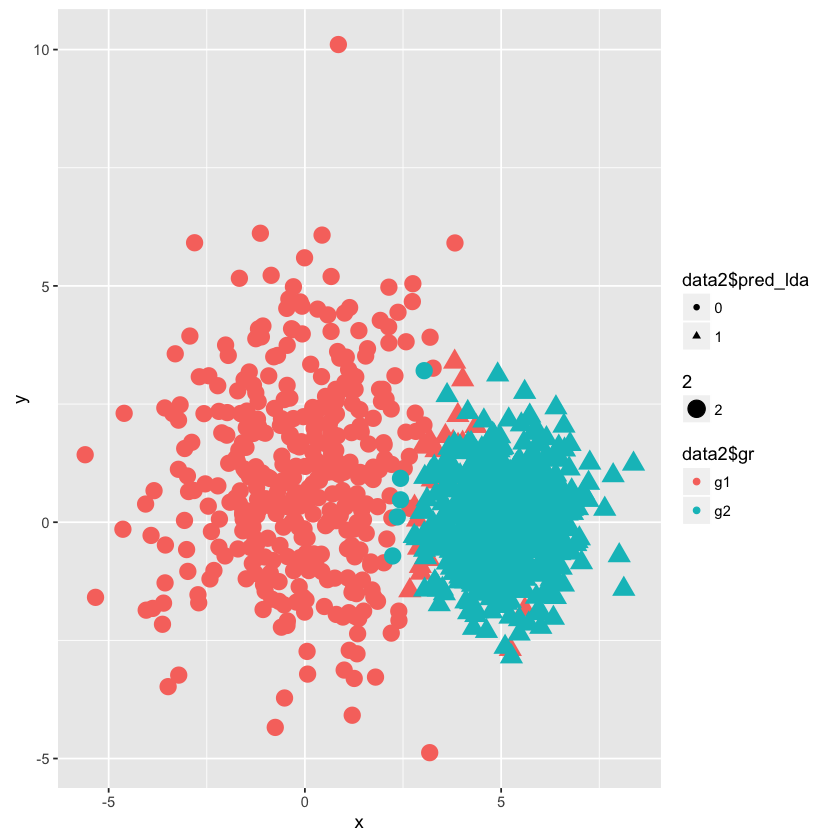

In [184]:
ggplot(data2,aes(x=x,y=y,col=data2$gr, shape = data2$pred_lda)) + geom_point(aes(size = 2))

In [185]:
mod_qda=qda(out ~ x + y + x2 + y2 + xy, data2)
predict_qda=predict(mod_qda,data2)
data2$pred_qda = predict_qda$class

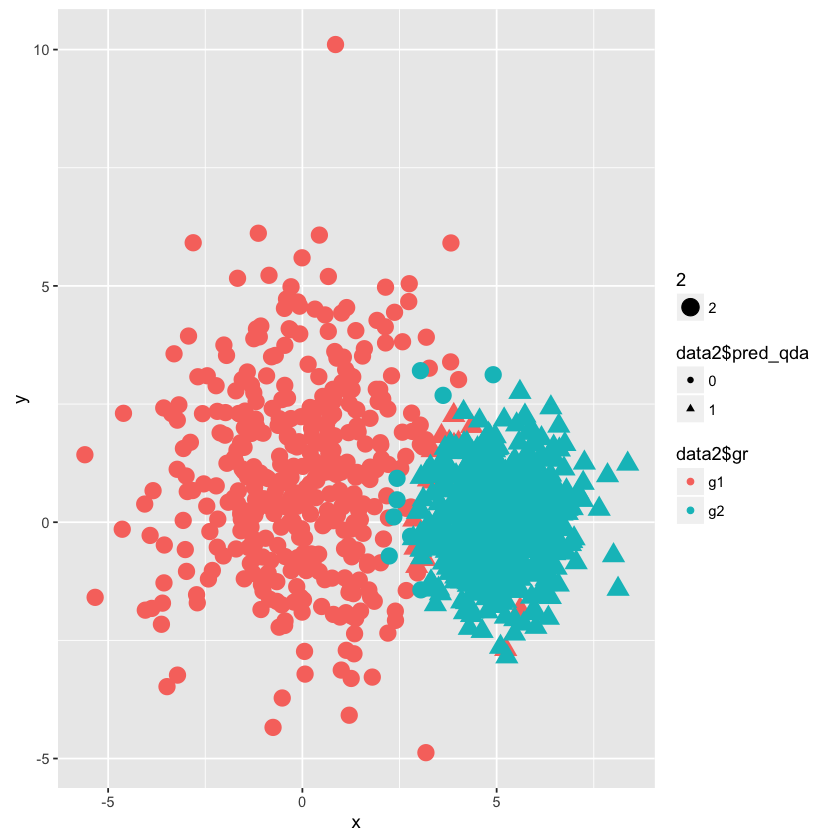

In [186]:
ggplot(data2,aes(x=x,y=y,col=data2$gr, shape = data2$pred_qda)) + geom_point(aes(size = 2))

## Last classification method : logistic regression

#TO CHOOSE THE RIGHT METHOD CROSS VALIDATION

**  logistic regression is part of the generalized model **

use glm net with family="binomial" ; if several group, use multinomial

In [212]:
modlog=cv.glmnet(as.matrix(data2[,1:2]),data2$gr,family="binomial")
pred_log=plogis(predict(modlog, as.matrix(data2[,1:2])))
data2$pred_log = factor(pred_log > 0.5)

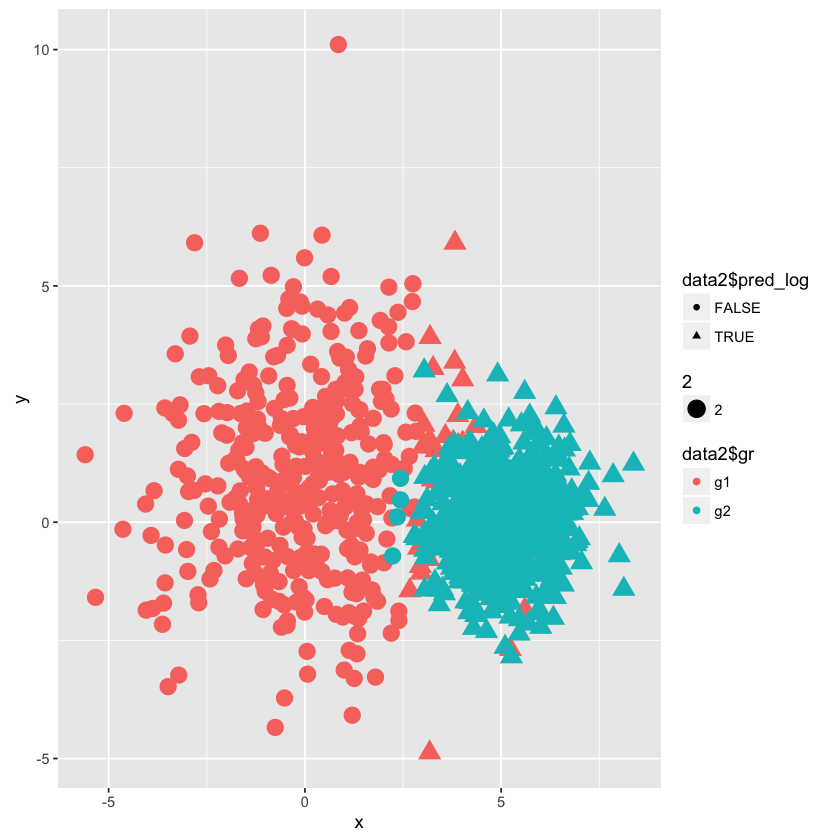

In [213]:
ggplot(data2,aes(x=x,y=y,col=data2$gr, shape = data2$pred_log)) + geom_point(aes(size = 2))

In [216]:
head(data2)

x          y gr out   ind pred_log         x2          y2         xy
1 1.3433008 -2.3592753 g1   0  TRUE    FALSE  1.8044571  5.56618012 -3.1692165
2 4.5906449 -0.2879178 g1   0  TRUE     TRUE 21.0740208  0.08289669 -1.3217286
3 0.7633705 -1.1829348 g1   0  TRUE    FALSE  0.5827346  1.39933466 -0.9030175
4 1.3269341  0.5998377 g1   0 FALSE    FALSE  1.7607540  0.35980521  0.7959450
5 3.2666904  3.2590222 g1   0 FALSE     TRUE 10.6712660 10.62122588 10.6462166
6 1.4836220  1.0217027 g1   0 FALSE    FALSE  2.2011341  1.04387633  1.5158205

In [ ]:
error_simple_list=vector("numeric")
error_complex_list=vector("numeric")


for (i in 1:1000) {
    #Créer les data test et train aléatoirement
    sample_line= sample(1:nrow(data2), size = 800, replace = F)
    data.train = data2[c(sample_line),]
    data.test= data2[-c(sample_line),]
    
    #Modele simple, compute un type d'error    
    mod.train=cv.glmnet(as.matrix(data.train[,1:2]),data.train$gr,family="binomial")
    predict_test=plogis(predict(mod.train, as.matrix(data.test[,1:2])))
    data.test$pred_mod.test = factor(predict_test > 0.5)
    table_simple=table(data.test$pred_mod.test,data.test$out)
    error_simple=((table_simple[2,1]+table_simple[1,2])/sum(table_simple))*100
    error_simple_list=c(error_simple_list,error_simple)
    
    #Modele complexe, compute un type d'error
    
    mod.train_complex=cv.glmnet(as.matrix(data.train[,c(1,2,7,8,9)]),data.train$gr,family="binomial")
    predict_test_complex=plogis(predict(mod.train_complex, as.matrix(data.test[,c(1,2,7,8,9)])))
    data.test$pred_mod_complex.test = factor(predict_test_complex > 0.5)
    table_complex=table(data.test$pred_mod_complex.test,data.test$out)
    error_complex=((table_complex[2,1]+table_complex[1,2])/sum(table_complex))*100
    error_complex_list=c(error_complex_list,error_complex)
}

summary(error_simple_list)
summary(error_complex_list)

# Crise Cardiaque

In [188]:
heart_complete=read.table("SAheart.data", header=TRUE, sep=",")

In [189]:
head(heart_complete)

row.names sbp tobacco  ldl adiposity famhist typea obesity alcohol age chd
1         1 160   12.00 5.73     23.11 Present    49   25.30   97.20  52   1
2         2 144    0.01 4.41     28.61  Absent    55   28.87    2.06  63   1
3         3 118    0.08 3.48     32.28 Present    52   29.14    3.81  46   0
4         4 170    7.50 6.41     38.03 Present    51   31.99   24.26  58   1
5         5 134   13.60 3.50     27.78 Present    60   25.99   57.34  49   1
6         6 132    6.20 6.47     36.21 Present    62   30.77   14.14  45   0

In [190]:
heart=heart_complete[,-c(1)]
head(heard)

ERROR: Error in head(heard): erreur d'évaluation de l'argument 'x' lors de la sélection d'une méthode pour la fonction 'head' : Erreur : objet 'heard' introuvable



### looking at interesting values

**modall**

In [191]:
modall = lm(heart$chd ~ ., data = heart, x = TRUE)
summary(modall)


Call:
lm(formula = heart$chd ~ ., data = heart, x = TRUE)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7464 -0.3299 -0.1045  0.3766  1.0348 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.5080306  0.2045921  -2.483 0.013385 *  
sbp             0.0013387  0.0010581   1.265 0.206441    
tobacco         0.0165841  0.0048610   3.412 0.000704 ***
ldl             0.0331791  0.0106747   3.108 0.002001 ** 
adiposity       0.0023026  0.0047696   0.483 0.629499    
famhistPresent  0.1734290  0.0412746   4.202 3.19e-05 ***
typea           0.0060817  0.0020369   2.986 0.002983 ** 
obesity        -0.0111711  0.0070315  -1.589 0.112821    
alcohol        -0.0002364  0.0008284  -0.285 0.775502    
age             0.0068440  0.0019868   3.445 0.000625 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4205 on 452 degrees of freedom
Multiple R-squared:  0.236,	Adjusted R-squared:  0.2208 
F-statistic

** conclusion : 5 important factors age + typea + famhist + ldl + tobacco **

** simple model **

In [192]:
mod_simple=lm (chd ~ age + typea + famhist + ldl + tobacco , data = heart)
predict_test=predict(mod_simple,heart[,c(2,3,5,6,9)])
heart$pred_mod.test = factor(predict_test > 0.5)

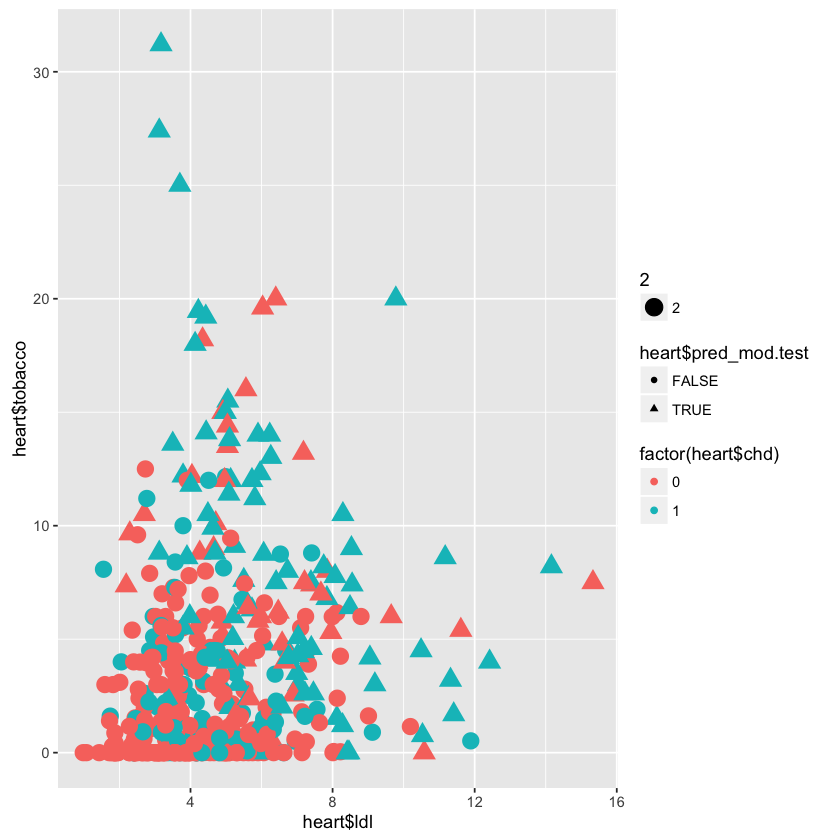

In [229]:
ggplot(heart,aes(x=heart$ldl,y=heart$tobacco,col=factor(heart$chd), shape = heart$pred_mod.test)) + geom_point(aes(size = 2))

** comparaison modèle complexe (ie avec tout) et modèle plus simple (juste les significatifs). **

In [244]:
for (i in 1:1000) {
    #Créer les data test et train aléatoirement
    sample_line= sample(1:nrow(heart), size = 400, replace = F)
    data.train = heart[c(sample_line),]
    data.test= heart[-c(sample_line),]
    
    #Modele simple, compute un type d'error
    mod.train=lm (chd ~ age + typea + famhist + ldl + tobacco , data = data.train)
    predict_test=predict(mod.train,data.test[,c(2,3,5,6,9)])
    data.test$pred_mod.test = factor(predict_test > 0.5)
    table_simple=table(data.test$pred_mod.test,data.test$chd)
    error_simple=((table_simple[2,1]+table_simple[1,2])/sum(table_simple))*100
    error_simple_list=c(error_simple_list,error_simple)
    
    #Modele complexe, compute un type d'error
    mod.train_complex=lm (chd ~ age + typea + famhist + ldl + tobacco + age +alcohol + obesity + adiposity + sbp , data = data.train)
    predict_test_complex=predict(mod.train_complex,data.test[,c(1:9)])
    data.test$pred_mod_complex.test = factor(predict_test_complex > 0.5)
    table_complex=table(data.test$pred_mod_complex.test,data.test$chd)
    error_complex=((table_complex[2,1]+table_complex[1,2])/sum(table_complex))*100
    error_complex_list=c(error_complex_list,error_complex)
}

summary(error_simple_list)
summary(error_complex_list)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.677  24.110  26.790  26.980  29.460  43.550 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.29   25.00   27.68   27.88   30.65   45.16 

**Conclusion, le plus compliqué a une plus mauvaise prediction**

** try lda **

In [245]:
for (i in 1:1000) {
    #Créer les data test et train aléatoirement
    sample_line= sample(1:nrow(heart), size = 400, replace = F)
    data.train = heart[c(sample_line),]
    data.test= heart[-c(sample_line),]
    
    #Modele simple, compute un type d'error
    mod.train=lda(chd ~ age + typea + famhist + ldl + tobacco , data = data.train)
    predict_test=predict(mod.train,data.test)
    data.test$pred_mod.test = predict_test$class
    table_simple=table(data.test$pred_mod.test,data.test$chd)
    error_simple=((table_simple[2,1]+table_simple[1,2])/sum(table_simple))*100
    error_simple_list=c(error_simple_list,error_simple)
    
    #Modele complexe, compute un type d'error
    mod.train_complex=lda(chd ~ age + typea + famhist + ldl + tobacco + age +alcohol + obesity + adiposity + sbp , data = data.train)
    predict_test_complex=predict(mod.train_complex,data.test)
    data.test$pred_mod_complex.test = predict_test_complex$class
    table_complex=table(data.test$pred_mod_complex.test,data.test$chd)
    error_complex=((table_complex[2,1]+table_complex[1,2])/sum(table_complex))*100
    error_complex_list=c(error_complex_list,error_complex)
}

summary(error_simple_list)
summary(error_complex_list)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.677  24.110  26.790  26.910  29.460  43.550 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.677  25.000  27.680  27.790  30.650  45.160 

**try gda**

In [243]:
for (i in 1:1000) {
    #Créer les data test et train aléatoirement
    sample_line= sample(1:nrow(heart), size = 350, replace = F)
    data.train = heart[c(sample_line),]
    data.test= heart[-c(sample_line),]
    
    #Modele simple, compute un type d'error
    mod.train=qda(chd ~ age + typea + famhist + ldl + tobacco , data = data.train)
    predict_test=predict(mod.train,data.test)
    data.test$pred_mod.test = predict_test$class
    table_simple=table(data.test$pred_mod.test,data.test$chd)
    error_simple=((table_simple[2,1]+table_simple[1,2])/sum(table_simple))*100
    error_simple_list=c(error_simple_list,error_simple)
    
    #Modele complexe, compute un type d'error
    mod.train_complex=qda(chd ~ age + typea + famhist + ldl + tobacco + age +alcohol + obesity + adiposity + sbp , data = data.train)
    predict_test_complex=predict(mod.train_complex,data.test)
    data.test$pred_mod_complex.test = predict_test_complex$class
    table_complex=table(data.test$pred_mod_complex.test,data.test$chd)
    error_complex=((table_complex[2,1]+table_complex[1,2])/sum(table_complex))*100
    error_complex_list=c(error_complex_list,error_complex)
}

summary(error_simple_list)
summary(error_complex_list)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.18   24.11   26.79   27.23   29.46   40.18 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.07   25.89   27.68   28.23   31.25   43.75 

** try logistic fit **

In [ ]:
heart$chd_num=as.numeric(heart$chd)
heart$famhist_num=as.numeric(heart$famhist)

In [270]:
error_simple_list=vector("numeric")
error_complex_list=vector("numeric")


for (i in 1:1000) {
    #Créer les data test et train aléatoirement
    sample_line= sample(1:nrow(heart), size = 350, replace = F)
    data.train = heart[c(sample_line),]
    data.test= heart[-c(sample_line),]
    
    #Modele simple, compute un type d'error    
    mod.train=cv.glmnet(as.matrix(data.train[,c(2,3,6,9,13)]),data.train$chd_num,family="binomial")
    predict_test=plogis(predict(mod.train, as.matrix(data.test[,c(2,3,6,9,13)])))
    data.test$pred_mod.test = factor(predict_test > 0.5)
    table_simple=table(data.test$pred_mod.test,data.test$chd_num)
    error_simple=((table_simple[2,1]+table_simple[1,2])/sum(table_simple))*100
    error_simple_list=c(error_simple_list,error_simple)
    
    #Modele complexe, compute un type d'error
    
    mod.train_complex=cv.glmnet(as.matrix(data.train[,c(1,2,3,4,6,7,8,9,13)]),data.train$chd_num,family="binomial")
    predict_test_complex=plogis(predict(mod.train_complex, as.matrix(data.test[,c(1,2,3,4,6,7,8,9,13)])))
    data.test$pred_mod_complex.test = factor(predict_test_complex > 0.5)
    table_complex=table(data.test$pred_mod_complex.test,data.test$chd_num)
    error_complex=((table_complex[2,1]+table_complex[1,2])/sum(table_complex))*100
    error_complex_list=c(error_complex_list,error_complex)
}

summary(error_simple_list)
summary(error_complex_list)

ERROR: Error in table_complex[2, 1]: indice hors limites


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.64   27.23   29.46   29.33   31.25   36.61 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.64   26.79   29.46   29.22   31.25   38.39 

In [308]:
heart_pca=heart[,c(1,2,3,4,6,7,8,9,10)]

In [309]:
mod.pca=dudi.pca(heart_pca[,-c(9)],scale=T,scan=F)

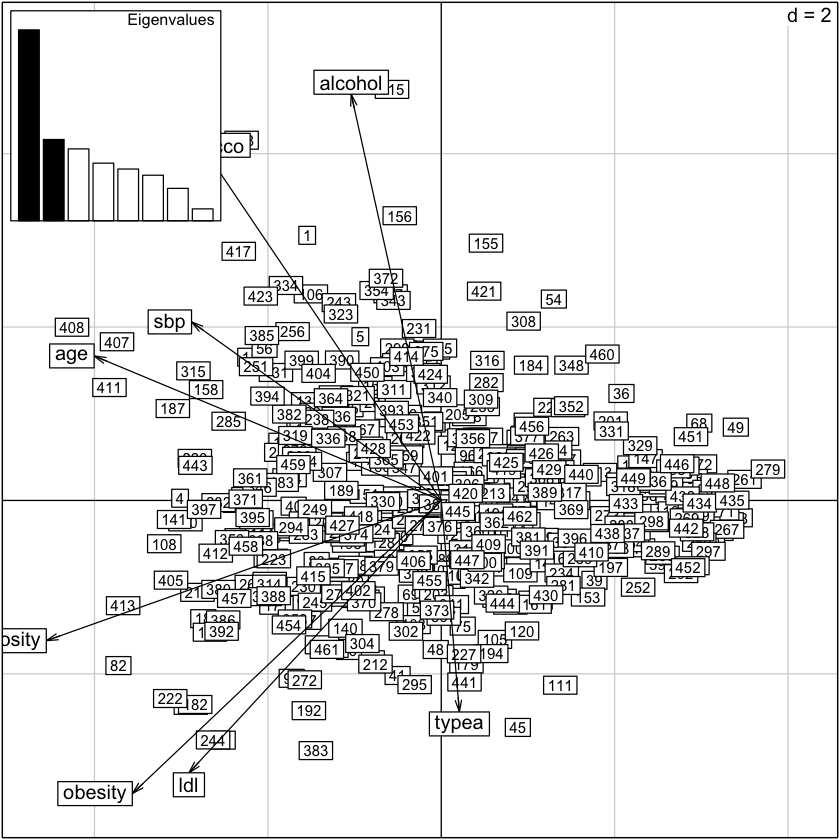

In [320]:
scatter(mod.pca)

ERROR: Error in s.class(mod.pca$li, fac = heart_pca$chd, add.plot = TRUE, col = rainbow(2)): factor expected for fac


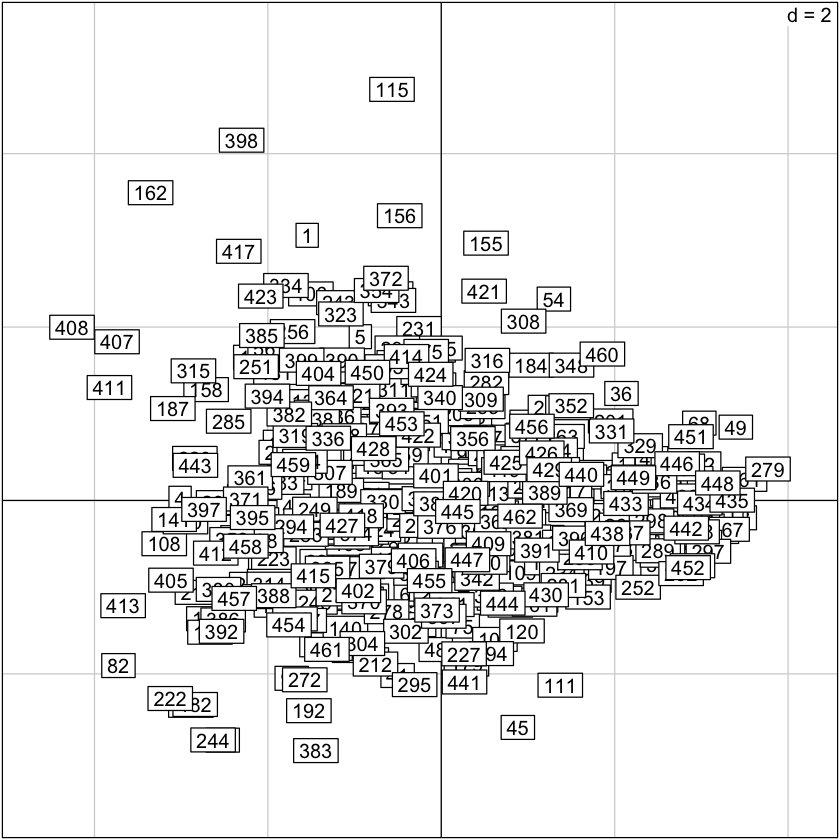

In [319]:
s.label(mod.pca$li)
s.class(mod.pca$li,heart_pca$chd,add.plot=TRUE,col=rainbow(2))

s.class                  package:ade4                  R Documentation

_P_l_o_t _o_f _f_a_c_t_o_r_i_a_l _m_a_p_s _w_i_t_h _r_e_p_r_e_s_e_n_t_a_t_i_o_n _o_f _p_o_i_n_t _c_l_a_s_s_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     performs the scatter diagrams with representation of point
     classes.

_U_s_a_g_e:

     s.class(dfxy, fac, wt = rep(1, length(fac)), xax = 1, 
         yax = 2, cstar = 1, cellipse = 1.5, axesell = TRUE, 
         label = levels(fac), clabel = 1, cpoint = 1, pch = 20, 
         col = rep(1, length(levels(fac))), xlim = NULL, ylim = NULL, 
         grid = TRUE, addaxes = TRUE, origin = c(0,0), 
         include.origin = TRUE, sub = "", csub = 1, possub = "bottomleft", 
         cgrid = 1, pixmap = NULL, contour = NULL, area = NULL, add.plot = FALSE)
     
_A_r_g_u_m_e_n_t_s:

    dfxy: a data frame containing the two columns for the axes

     fac: a factor partitioning the rows of the data frame in classes

      wt: a vector of the point weightings of the data frame used for
          computing the means (star centers) and the ellipses of
          dispersion

     xax: the column number of x in ‘dfxy’

     yax: the column number of y in ‘dfxy’

   cstar: a number between 0 and 1 which defines the length of the star
          size

cellipse: a positive coefficient for the inertia ellipse size

 axesell: a logical value indicating whether the ellipse axes should be
          drawn

   label: a vector of strings of characters for the point labels

  clabel: if not NULL, a character size for the labels, used with
          ‘par("cex")*clabel’

  cpoint: a character size for plotting the points, used with
          ‘par("cex")*cpoint’. If zero, no points are drawn

     pch: if ‘cpoint’ > 0, an integer specifying the symbol or the
          single character to be used in plotting points

     col: a vector of colors used to draw each class in a different
          color

    xlim: the ranges to be encompassed by the x, if NULL they are
          computed

    ylim: the ranges to be encompassed by the y, if NULL they are
          computed

    grid: a logical value indicating whether a grid in the background
          of the plot should be drawn

 addaxes: a logical value indicating whether the axes should be plotted

  origin: the fixed point in the graph space, for example c(0,0) the
          origin axes

include.origin: a logical value indicating whether the point "origin"
          should be belonged to the graph space

     sub: a string of characters to be inserted as legend

    csub: a character size for the legend, used with ‘par("cex")*csub’

  possub: a string of characters indicating the sub-title position
          ("topleft", "topright", "bottomleft", "bottomright")

   cgrid: a character size, parameter used with par("cex")* ‘cgrid’ to
          indicate the mesh of the grid

  pixmap: an object 'pixmap' displayed in the map background

 contour: a data frame with 4 columns to plot the contour of the map :
          each row gives a segment (x1,y1,x2,y2)

    area: a data frame of class 'area' to plot a set of surface units
          in contour

add.plot: if TRUE uses the current graphics window

_V_a_l_u_e:

     The matched call.

_A_u_t_h_o_r(_s):

     Daniel Chessel

_E_x_a_m_p_l_e_s:

     if(!adegraphicsLoaded()) {
       xy <- cbind.data.frame(x = runif(200, -1, 1), y = runif(200, -1, 1))
       posi <- factor(xy$x > 0) : factor(xy$y > 0)
       coul <- c("black", "red", "green", "blue")
       par(mfrow = c(2, 2))
       s.class(xy, posi, cpoi = 2)
       s.class(xy, posi, cell = 0, cstar = 0.5)
       s.class(xy, posi, cell = 2, axesell = FALSE, csta = 0, col = coul)
       s.chull(xy, posi, cpoi = 1)
       par(mfrow = c(1, 1))
       
       ## Not run:
     
       data(banque)
       dudi1 <- dudi.acm(banque, scannf = FALSE)
       coul = rainbow(length(levels(banque[, 20])))
       par(mfro

# Dimension reduction

## PCA

Function : reduce to dimensions that matter

In [276]:
library(ade4)

Warning message:
: package ‘ade4’ was built under R version 3.2.4

In [271]:
data(iris)

In [272]:
head(iris)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa

In [273]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

Function dudi.pca
- first argument : pca on what you want to do pca on
- do you want to rescale data : 90% of the time you should rescale it
- Scan allows you not to choose how many axes (else R asks you how many axes you want)
 (takes 2 component by default, no explicit rule how to choose number of axes, you should keep more than 70% of the variants)

In [277]:
mod.pca=dudi.pca(iris[,1:4],scale=T,scan=F)

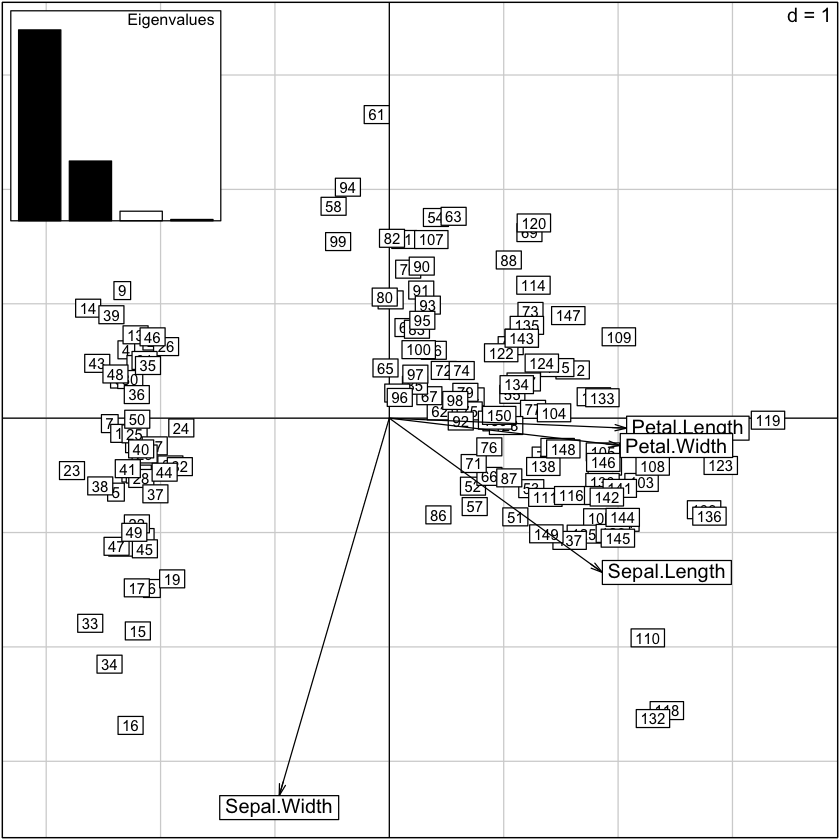

In [280]:
scatter(mod.pca)


** analyzing** 
- eigen values number of information that we kept. Here most of the variation => PCR is legitimate
- all the numbers are the individual (position of each individuals are coordinates of the two new components)
- we don't know if someone is in a corner, if it has a big petal. 


understanding why plant 63 is there : 
- draw a line between zero and 63
- take an arrrow (sepal width), continuer la ligne. Projeter 63 sur la ligne de sepal width, et mesurer jusqu'à zero
- vu que c'est dans le sens opposé de sepal width , c'est much smaller que average
- sepal length petit effet
- petal width petal length, no effect for 63

En fait, il faut se rappeler que c'est un mix des effets !!!!!!!
- quand on en voit un bizarre, aller revérifier les valeurs
- En gros, se rappeler que chaque axe est une combinaison linéaire des variables

Ici 2 groupes; qui sont clairement lié à la taille des petales => qu'est ce qu'ont les individus en commun ?


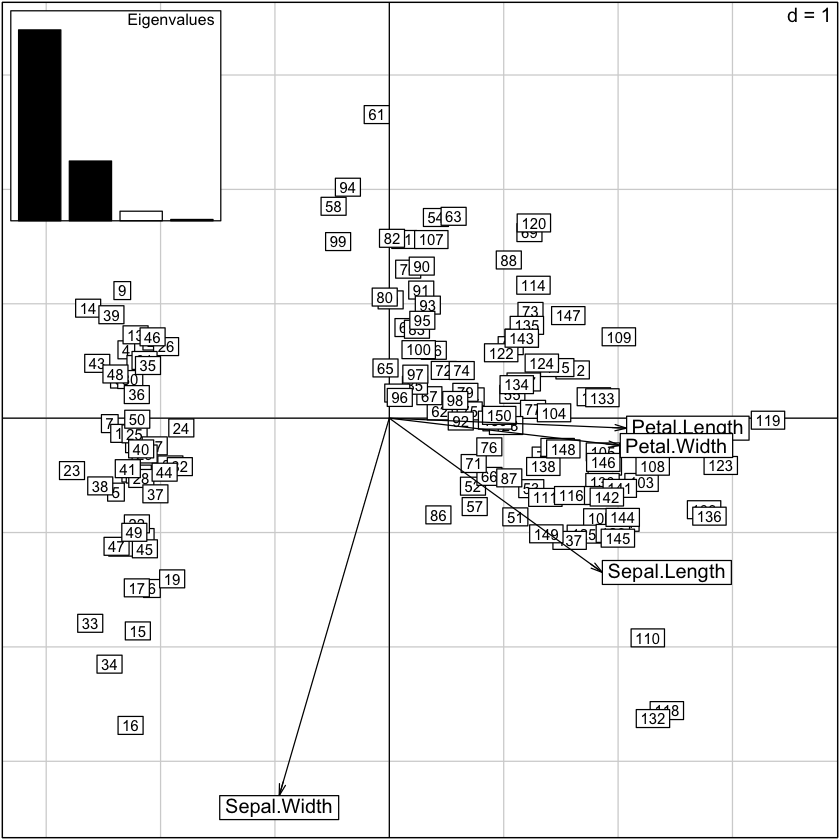

In [291]:
scatter(mod.pca)
#s.corcircle(mod.pca$ca)

**Pour tracer avec des couleurs**

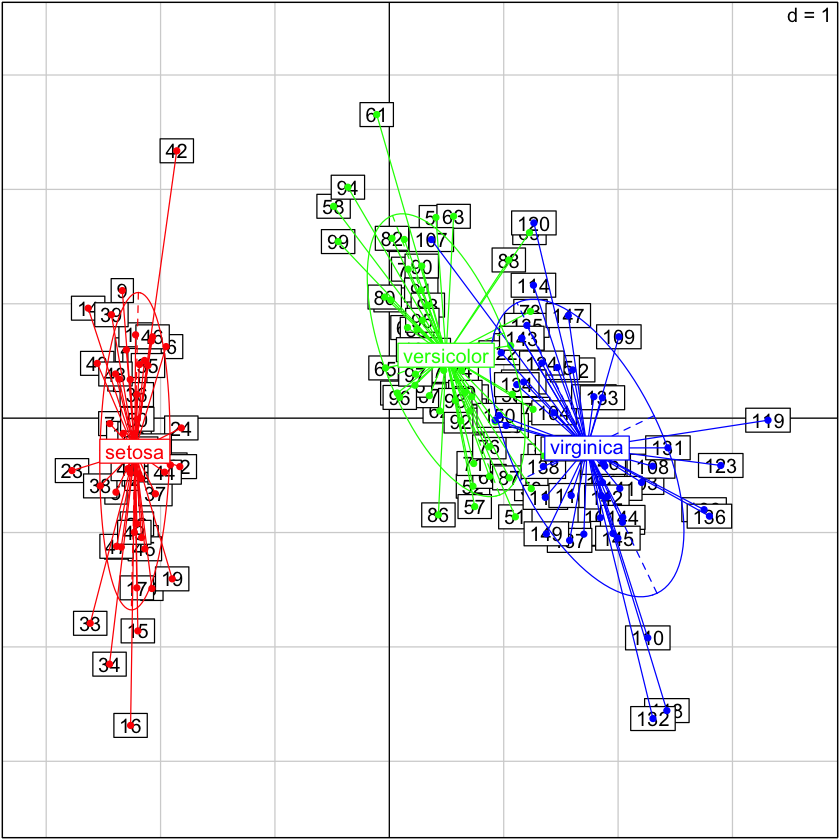

In [292]:
s.label(mod.pca$li)
s.class(mod.pca$li,iris$Species,add.plot=TRUE,col=rainbow(3))

ici on pourrait plotter les axes 2 vs 3 car le 1 séparer les rouges des autres. Et les autres. POur cela mod.pca""li correspond

- mod.pca can used as an input for data train
- after wards use mod.pca""co, do a scalar product of those on your data to get your coordintes in that plan

In [293]:
mod.pca$co

Comp1       Comp2
Sepal.Length  0.8901688 -0.36082989
Sepal.Width  -0.4601427 -0.88271627
Petal.Length  0.9915552 -0.02341519
Petal.Width   0.9649790 -0.06399985

## CLustering 

You want to cluster automatically (without looking at PCA)

Calculate all the distances between the point

In [300]:
help(dist)

dist                   package:stats                   R Documentation

_D_i_s_t_a_n_c_e _M_a_t_r_i_x _C_o_m_p_u_t_a_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     This function computes and returns the distance matrix computed by
     using the specified distance measure to compute the distances
     between the rows of a data matrix.

_U_s_a_g_e:

     dist(x, method = "euclidean", diag = FALSE, upper = FALSE, p = 2)
     
     as.dist(m, diag = FALSE, upper = FALSE)
     ## Default S3 method:
     as.dist(m, diag = FALSE, upper = FALSE)
     
     ## S3 method for class 'dist'
     print(x, diag = NULL, upper = NULL,
           digits = getOption("digits"), justify = "none",
           right = TRUE, ...)
     
     ## S3 method for class 'dist'
     as.matrix(x, ...)
     
_A_r_g_u_m_e_n_t_s:

       x: a numeric matrix, data frame or ‘"dist"’ object.

  method: the distance measure to be used. This must be one of
          ‘"euclidean"’, ‘"maximum"’, ‘"manhattan"’, ‘"canberra"’,
          ‘"binary"’ or ‘"minkowski"’.  Any unambiguous substring can
          be given.

    diag: logical value indicating whether the diagonal of the distance
          matrix should be printed by ‘print.dist’.

   upper: logical value indicating whether the upper triangle of the
          distance matrix should be printed by ‘print.dist’.

       p: The power of the Minkowski distance.

       m: An object with distance information to be converted to a
          ‘"dist"’ object.  For the default method, a ‘"dist"’ object,
          or a matrix (of distances) or an object which can be coerced
          to such a matrix using ‘as.matrix()’.  (Only the lower
          triangle of the matrix is used, the rest is ignored).

digits, justify: passed to ‘format’ inside of ‘print()’.

right, ...: further arguments, passed to other methods.

_D_e_t_a_i_l_s:

     Available distance measures are (written for two vectors x and y):

     ‘euclidean’: Usual distance between the two vectors (2 norm aka
          L_2), sqrt(sum((x_i - y_i)^2)).

     ‘maximum’: Maximum distance between two components of x and y
          (supremum norm)

     ‘manhattan’: Absolute distance between the two vectors (1 norm aka
          L_1).

     ‘canberra’: sum(|x_i - y_i| / |x_i + y_i|).  Terms with zero
          numerator and denominator are omitted from the sum and
          treated as if the values were missing.

          This is intended for non-negative values (e.g., counts):
          taking the absolute value of the denominator is a 1998 R
          modification to avoid negative distances.

     ‘binary’: (aka _asymmetric binary_): The vectors are regarded as
          binary bits, so non-zero elements are ‘on’ and zero elements
          are ‘off’.  The distance is the _proportion_ of bits in which
          only one is on amongst those in which at least one is on.

     ‘minkowski’: The p norm, the pth root of the sum of the pth powers
          of the differences of the components.

     Missing values are allowed, and are excluded from all computations
     involving the rows within which they occur.  Further, when ‘Inf’
     values are involved, all pairs of values are excluded when their
     contribution to the distance gave ‘NaN’ or ‘NA’.  If some columns
     are excluded in calculating a Euclidean, Manhattan, Canberra or
     Minkowski distance, the sum is scaled up proportionally to the
     number of columns used.  If all pairs are excluded when
     calculating a particular distance, the value is ‘NA’.

     The ‘"dist"’ method of ‘as.matrix()’ and ‘as.dist()’ can be used
     for conversion between objects of class ‘"dist"’ and conventional
     distance matrices.

     ‘as.dist()’ is a generic function.  Its default method handles
     objects inheriting from class ‘"dist"’, or coercible to matrices
     using ‘as.matrix()’.  Support for classes representing distances
     (also known as dissimilariti

In [294]:
d=dist(mod.pca$li)

**Building the dendogramm**
- either take the highest jump
- or take the first big jump

In [295]:
h=hclust(d)

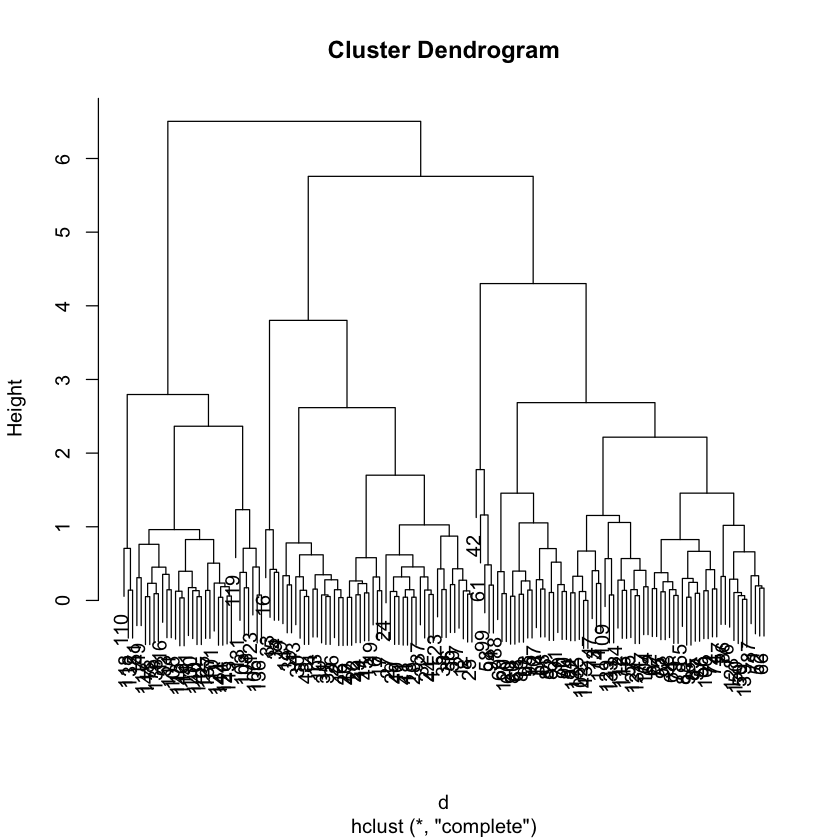

In [297]:
plot(h)

####Changing the linkage method ie how you link a group and a point

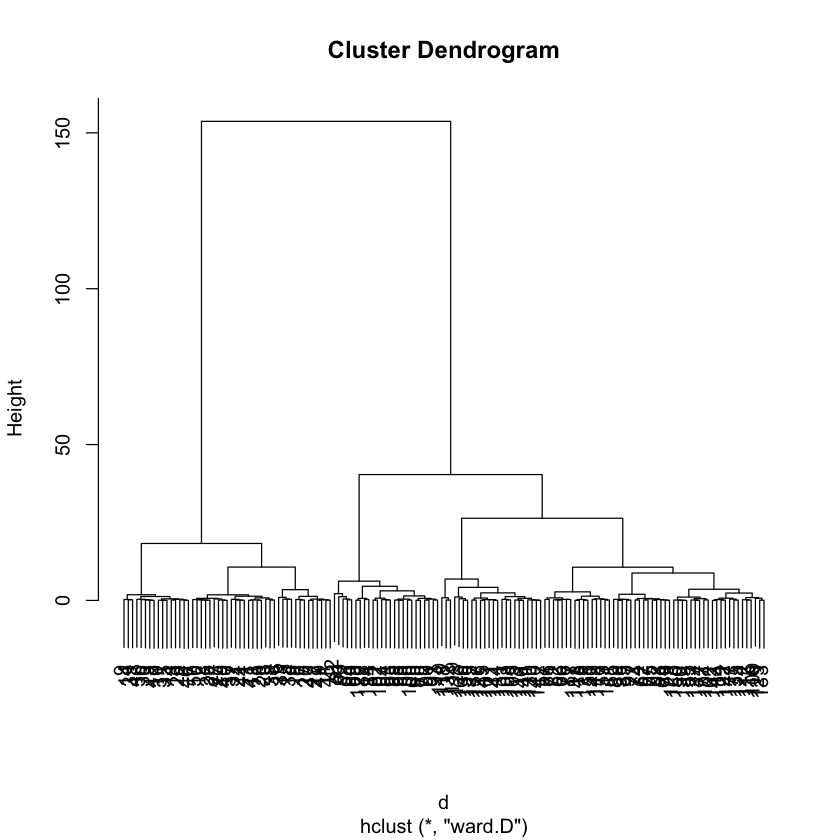

In [299]:
h=hclust(d, method="ward.D")
plot(h)

** here it is much clearer! (looks like what you observe visually on PCA, two major groups)**

## Example music PCA

In [325]:
dat4 = read.table("CM4.dat", h = T, sep = ",")
dat4 = dat4[,-1]
colnames(dat4) = c("Rock", "Rap", "Reggae", "classique" , "R&B", "Latino", "Jazz", "Elec", "Country")

In [326]:
dat4

Rock Rap Reggae classique R&B Latino Jazz Elec Country
1    11  15     14        13  17     16   14   14      15
2    11  15     14        13  17     16   14   14      15
3    16  11     17         2   5      4    9   12       9
4    20   1     15        17   7     10   15    1      10
5    18  18     18        16  18     15   18   15      15
6    20  11     17        10  11     13   13   14       9
7    13  11      9        11  10     11    9   11      11
8     3   4      3         1   6      4    2    5       2
9    15   4      1        12   1     10   12   16      16
10   15   7      8        14   7      7   10   10       5
11   17  17     14         5   8      8    8    8      10
12   14  15      1        15   9     11   17   20       2
13   15  13     10         8  11      9    7   18      13
14   15   1     10        13   1     13   13   16      10
15   13  16      9        11  11      8    9   18       5
16   20  20      7         7  16     15   16   12      12
17   15  13     10         8  11      9    7   18      13
18    6   6      4         5   2      3    6    1       1
19   16  10      7         5  10      7   13   18       8
20   16  16     14        10  12      8   14   20       1
21    1  20     19         1  19     16   10    4       4
22   15  10     13        11  17     15   14    9      16
23   18  15     14        11  13      8    8   10       1
24   11  10     11         7  15     16   12   14       9
25   20   3     15        12  15     17   12   10       3
26   14  14     14        20  11     14   14    2      14
27   18  10     12        13  19     16    7   13      10
28    6   3      1         6   2      1    4    3       3
29    1   1      1         1   1      1    1    1       1
30    2   2      2         2   2      2    2    2       1
31    3  17     12         1   9      2    2   19       2
32   14  10      2        10  17     16    1   14       1
33   18  15     11        12  10      8    9   15       1
34   20  10     10         1  10     16   15    9      14
35    5   5      1         5   5      3    1    1       2
36    7   8      7         7   9      9    6    5       5
37   18  17     19        17  14     18   19   19      12
38   18   8     15        15   1      1    5   17       1
39    1   1      1         1   1      1    1    1       1
40   19   1     10        10   1     10   16   14      14
41    1  12     12        12   1      1    1   18       2
42   18  16     12        10   4      2    3   18      16
43   16  12     13        16   2     12   17    1      18
44   18  18     11        11  15     13   11   15      11
45   10   1      5        20   1      9   11   11      13
46   18   2     10        14   3      9    2    1      16
47    1   1      1         1   1      1    1    1       1
48   17  19     14        11   7      7    9   20       6
49   17  16     11        16  14     20   15   12       1
50   17   3     13        14  14     10   10    2      12
51    3   8      4         3   6      2    4    8       5
52   20   6     13        15   5      5   13   10      11
53    6   2      3         5   1      3    1    1       5
54   19  15     15        12   6      7    7   17       8
55   20   1      5         5   1      5    5    7       5
56   20  13     11        12  10     10   10   14      13
57   16  12      6        15  13     12   13   19      20
58   20  14      5        16  12     10   17    8       8
59   15   1     20        10   1     15   10   10       8
60   18  16      7        17   1      5   17   20       8
61    4  20     11        15  20      1   19   19       1
62   18  16     14        14  12     10   16    1       3
63   15  10     16        15  15     15   15   15      15
64   15  14     12        14   6     14   17   17      20
65   20   1     20        10   1     12   12   12       1
66    1   1      1         1   1      1    1    1       1
67   12  13      5        19  18      8    9    1      16
68   20   8     17        17  14     14   17   15      14
6

In [327]:
mod.pca=dudi.pca(dat4,scale=T,scan=F)

ERROR: Error in s.class(mod.pca$li, colnames(dat4), add.plot = TRUE, col = rainbow(3)): factor expected for fac


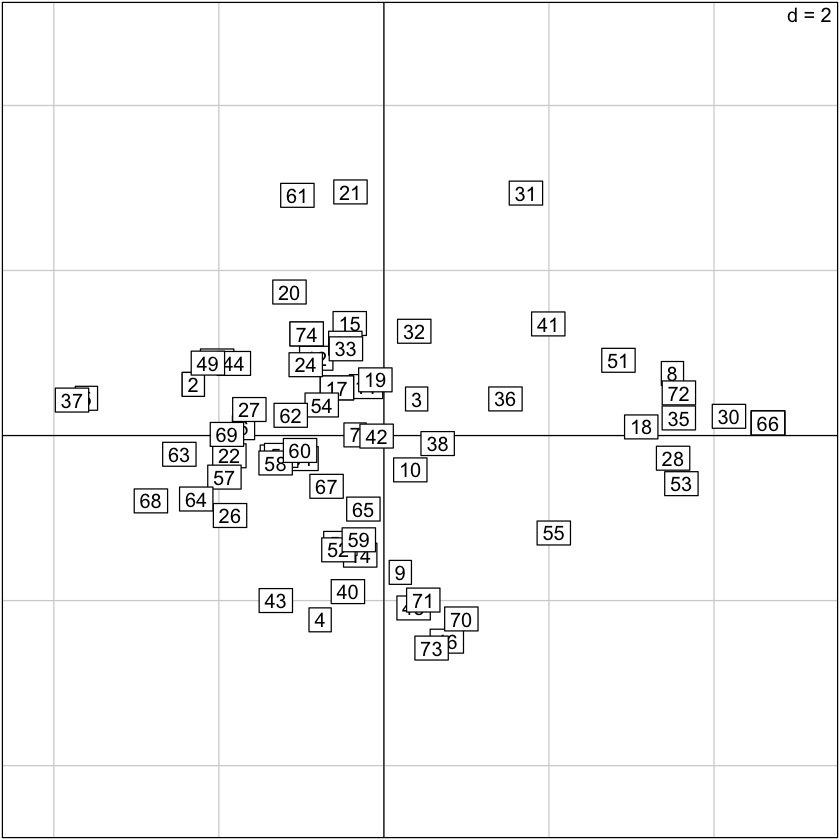

In [330]:
s.label(mod.pca$li)
s.class(mod.pca$li,colnames(dat4),add.plot=TRUE,col=rainbow(3))